## Equally-Weighted Portfolio Backtest.

In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2009-11-16 00:00:00
Num Train Iterations: 108
Num OOS Daily Points: 2233


In [4]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 108/108 [00:00<00:00, 123.34it/s]


StrategyStatistics:
* final_nav = 0.962904
* geom_avg_total_r = -0.005268
* geom_avg_xs_r = -0.035726
* std_xs_r = 0.235168
* min_xs_r = -0.082777
* max_xs_r = 0.105879
* skew = 0.208670
* kurtosis = 7.710024
* max_dd = -0.525423
* sharpe = -0.151916
* alpha_buy_hold = 0.020198
* tracking_error_buy_hold = 0.052749
* ir_buy_hold = 0.382901
* factor_loadings = {'low_risk': 0.2978470950027937, 'momentum': -0.11879317683246751, 'quality': -0.11671593745683558, 'size': 0.03238576537632649, 'value': -0.22977592370237643, 'spx': 1.0180001458023744}
* alpha_benchmark = 0.032329
* alpha_benchmark_pvalue = 0.044703
* tracking_error_benchmark = 0.044883
* ir_benchmark = 0.720280
* ttest_pval = 0.446424
* levene_pval = 0.105995
* timing_ability_coef = 0.029523
* timing_ability_pval = 0.008470

In [5]:
result.std_xs_r, result.sharpe

(0.23516781027947528, -0.15191573895723506)

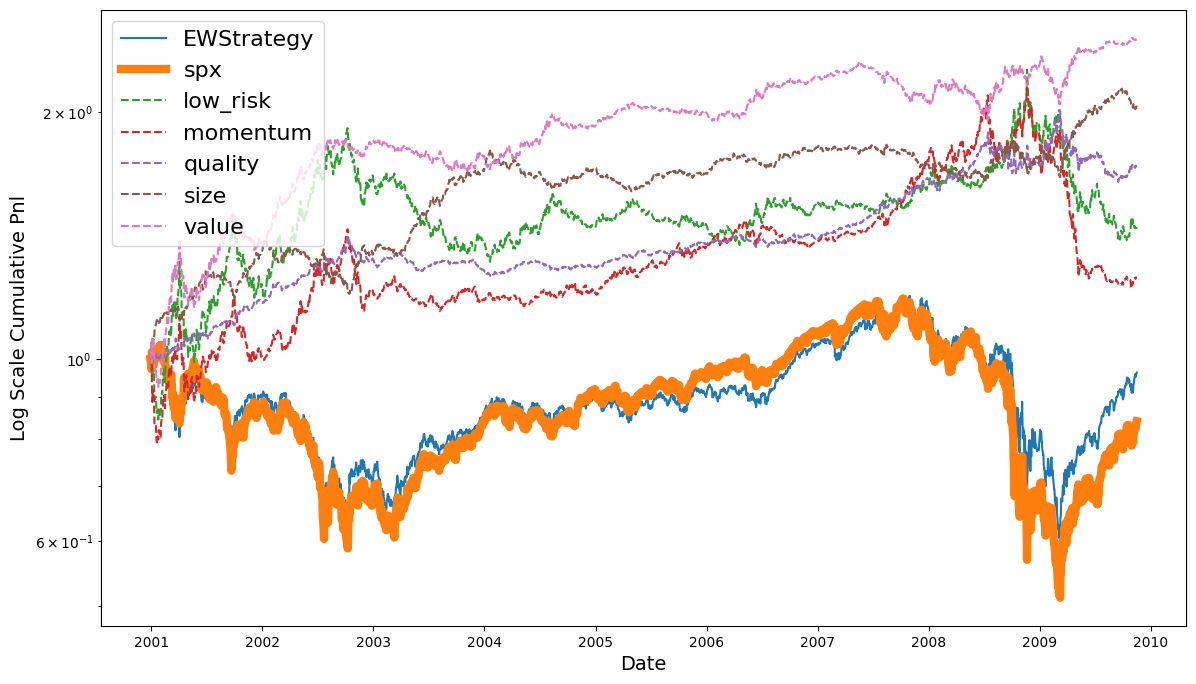

In [6]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

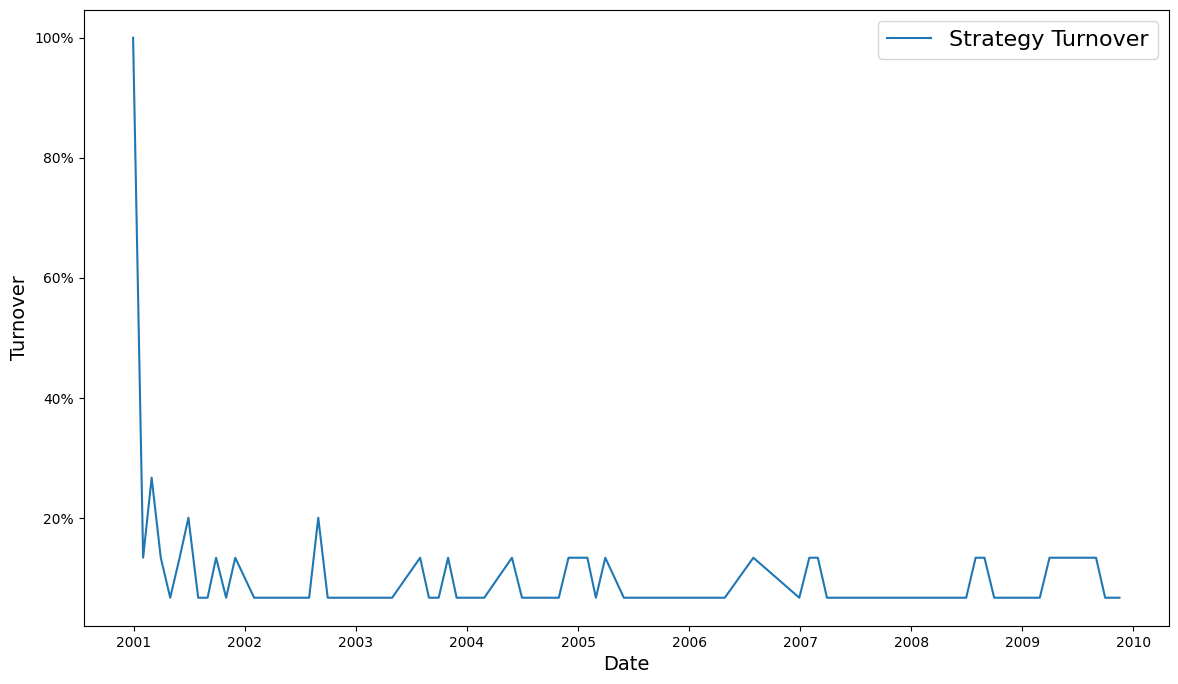

In [7]:
runner.plot_turnover()

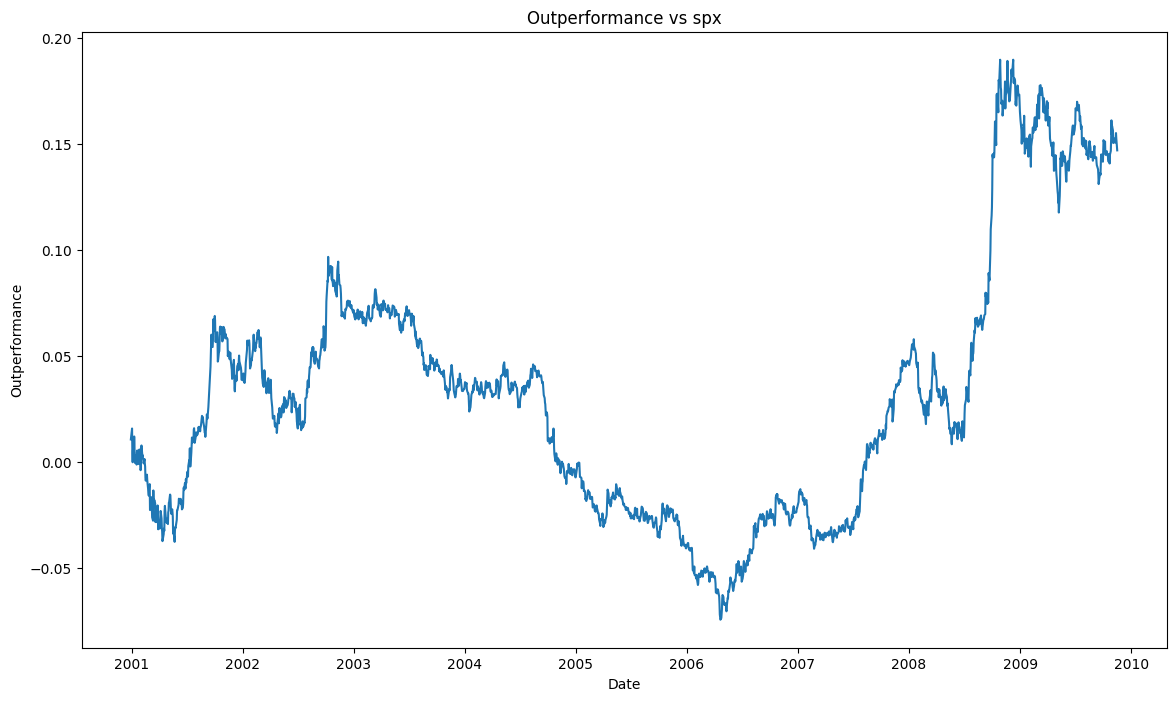

In [8]:
runner.plot_outperformance(mkt_only=True)

In [9]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")

OSError: Cannot save file into a non-existent directory: '/Users/buchkovv/qamsi/qamsi/backtests/runs'